In [57]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import random

from src.utils import BuildGraph, CreateRectanglesFromData

data = np.loadtxt("data/rectangles.txt")

## Summary stats

In [56]:
print("Number of rectangles: {}".format(data.shape[0]))
print("Number of unique rectangles: {}".format(np.unique(data, axis=0).shape[0]))
print("Number of unqiue rectangle corner points: {}".format(np.unique(data[:,0:2], axis=0).shape[0]))

Number of rectangles: 100000
Number of unique rectangles: 33241
Number of unqiue rectangle corner points: 400


## Graph conectivity

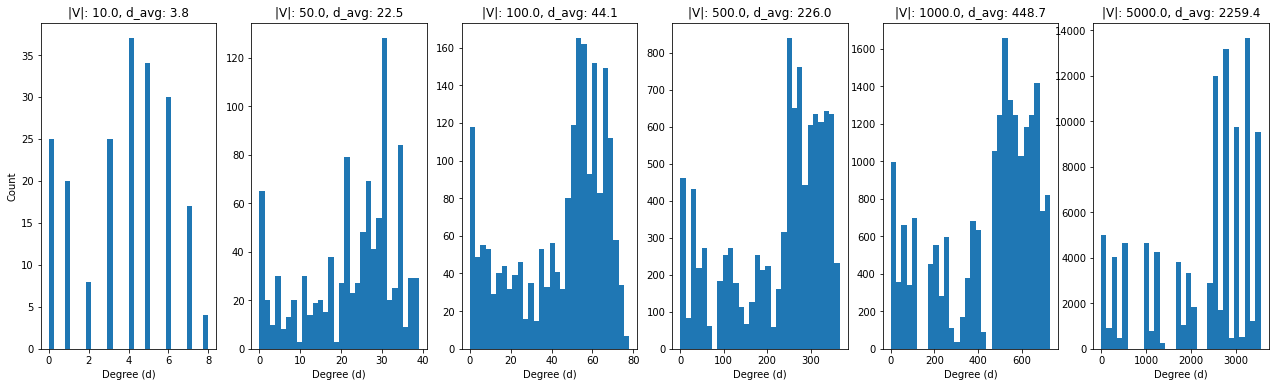

In [44]:
def BuildSampleGraphDegrees(N):
    D = []
    for n in range(0,20):
        G = BuildGraph(random.sample(CreateRectanglesFromData(), N)) 
        for v in G:
            D.append(len(G[v]))
    
    return D

N = 6
fig, axes = plt.subplots(nrows=1, ncols=N, figsize=(22, 6))
V_list = [10, 50, 100, 500, 1000, 5000]
D_list = []
for i, ax in enumerate(axes.flatten()):
    num_v = V_list[i]
    D = BuildSampleGraphDegrees(num_v)
    hist, bins = np.histogram(np.asarray(D), bins=30)
    ax.hist(D, bins)
    ax.title.set_text("|V|: {:.1f}, d_avg: {:.1f}".format(num_v, sum(D)/len(D)))
    ax.set_xlabel("Degree (d)")
    if i == 0:
        ax.set_ylabel("Count")
    
    D_list.append(sum(D)/len(D))

plt.show()

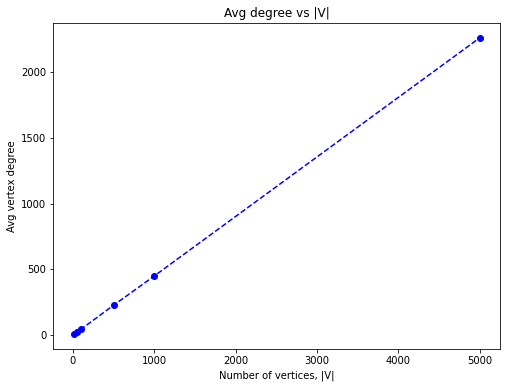

In [45]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
plt.plot(V_list, D_list, '--bo')
plt.title("Avg degree vs |V|")
plt.xlabel("Number of vertices, |V|")
plt.ylabel("Avg vertex degree")
plt.show()

## Rectangle sizes

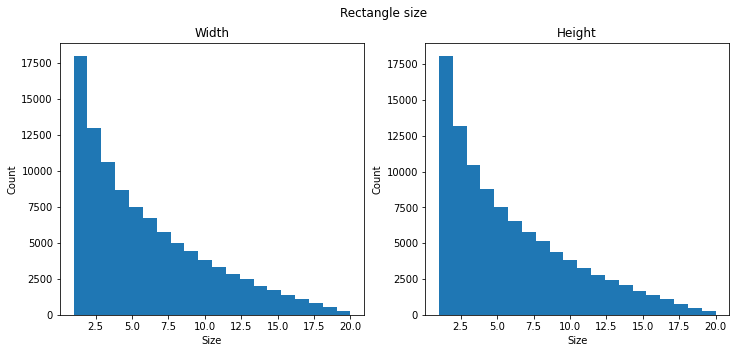

In [46]:
hist, bins = np.histogram(data[:,2], bins=20)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(data[:,2], bins)
ax1.title.set_text('Width')
ax1.set_xlabel('Size')
ax1.set_ylabel('Count')

hist, bins = np.histogram(data[:,3], bins=20)
ax2.hist(data[:,3], bins)
ax2.title.set_text('Height')
ax2.set_xlabel('Size')
ax2.set_ylabel('Count')
    
fig.set_figheight(5)
fig.set_figwidth(12)
fig.suptitle("Rectangle size")
plt.show()

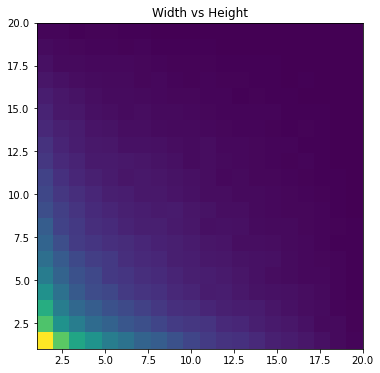

In [52]:
H, xedges, yedges = np.histogram2d(data[:,2], data[:,3], bins=20)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, title='Width vs Height', aspect='equal')
X, Y = np.meshgrid(xedges, yedges)
ax.pcolormesh(X, Y, H)
plt.show()

## Test degree and size correlation with location

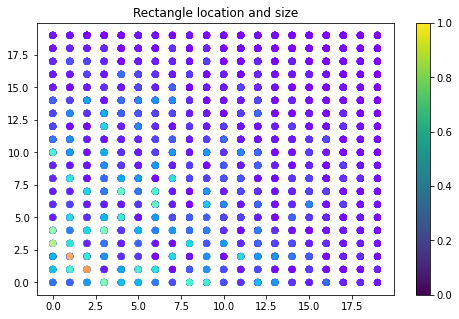

In [68]:
plt.figure(figsize=(8, 5))
N = 10000
sample_idxs = np.random.randint(data.shape[0], size=N)
area = (data[:,3]*data[:,2])[sample_idxs]
normalized_area = area / np.amax(area)
colors = cm.rainbow(normalized_area)

plt.scatter(data[:,0][sample_idxs], data[:,1][sample_idxs], c=colors)
plt.colorbar()
plt.title("Rectangle location and size")
plt.show()

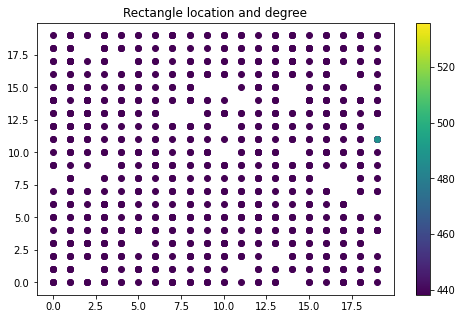

In [69]:
N = 1000
rectangles = random.sample(CreateRectanglesFromData(), N)
G = BuildGraph(rectangles)

plt.figure(figsize=(8, 5))
for r in rectangles:
    plt.scatter(data[r.uuid, 0], data[r.uuid, 1], c=len(G[r.uuid]))
plt.colorbar()
plt.title("Rectangle location and degree")
plt.show()